Generating discrete gap spectrum (N=500000000)...


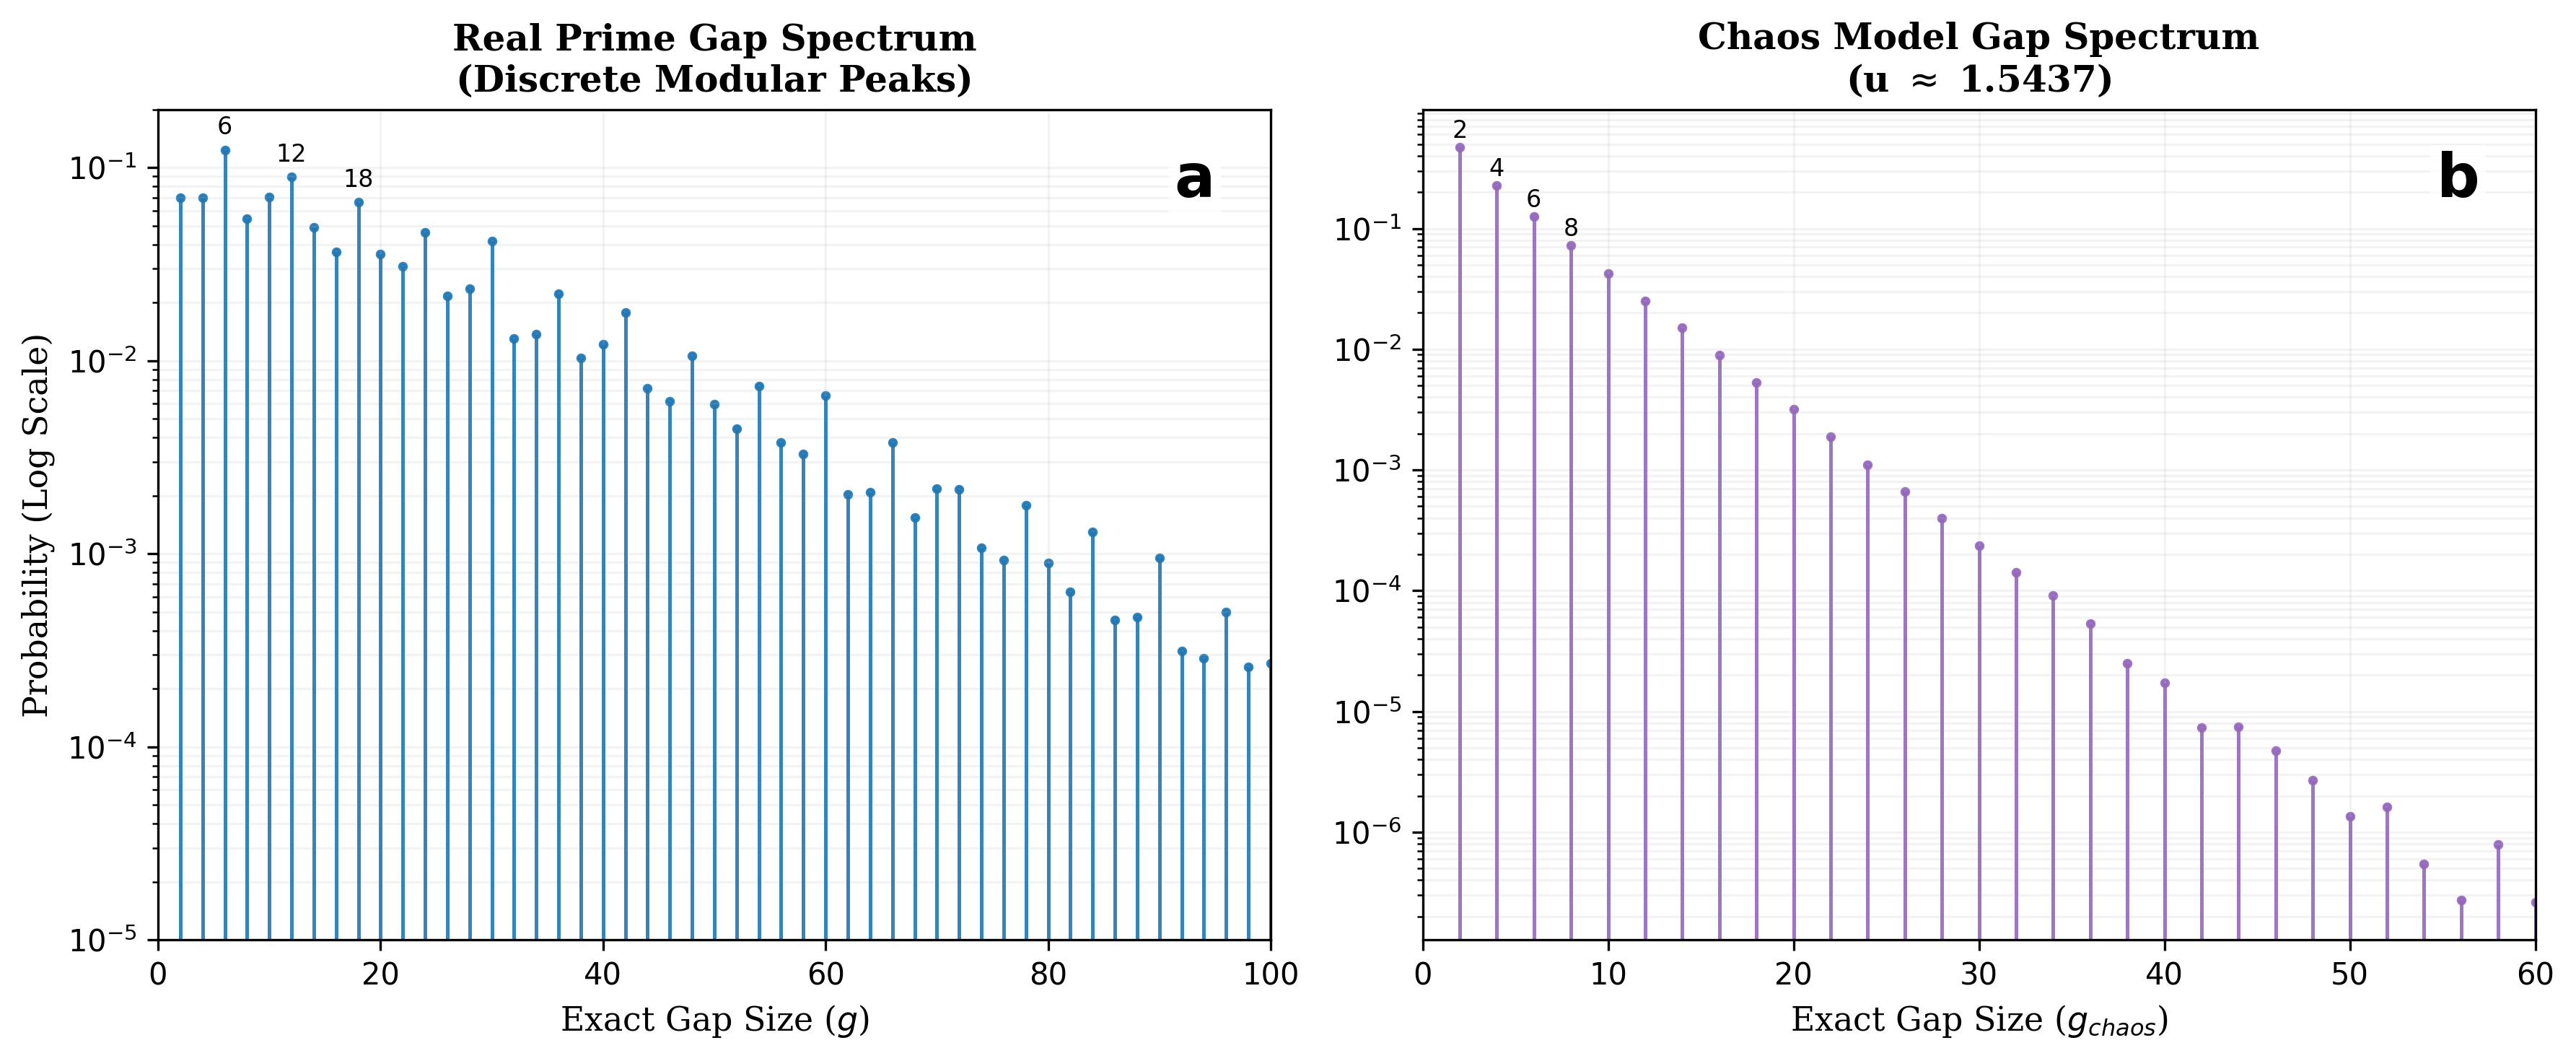

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_discrete_gap_spectrum_labeled(limit=500000000):
    print(f"Generating discrete gap spectrum (N={limit})...")
    
    # --- 1. Data Generation (Unchanged) ---
    # Real Primes
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[0:2] = False
    for i in range(2, int(limit**0.5) + 1):
        if is_prime[i]:
            is_prime[i*i : limit+1 : i] = False
    primes = np.nonzero(is_prime)[0]
    real_gaps = np.diff(primes)
    
    # Chaos Model
    u = 1.543689012692076
    x = 0.1
    # Warmup
    for _ in range(10000): x = 1 - u * x**2
    
    # Fast generation
    sim_len = limit
    x_vals = np.zeros(sim_len)
    x_curr = x
    for i in range(sim_len):
        x_curr = 1 - u * x_curr**2
        x_vals[i] = x_curr
        
    is_L = (x_vals < 0)
    chaos_indices = np.nonzero(is_L)[0]
    chaos_gaps = np.diff(chaos_indices)

    # --- 2. Core Processing: Spectrum Statistics ---
    def get_gap_spectrum(gaps, max_gap=100):
        counts = np.bincount(gaps)
        if len(counts) > max_gap:
            counts = counts[:max_gap+1]
        probs = counts / len(gaps)
        x_axis = np.arange(len(probs))
        return x_axis, probs

    x_real, y_real = get_gap_spectrum(real_gaps, max_gap=100)
    x_chaos, y_chaos = get_gap_spectrum(chaos_gaps, max_gap=60)

    # --- 3. Plotting ---
    plt.figure(figsize=(12, 5), dpi=300)
    
    # Subplot 1: Real Primes
    ax1 = plt.subplot(1, 2, 1)
    plt.vlines(x_real, 0, y_real, colors='#1f77b4', linewidth=1.2, alpha=0.9, label='Prime Gaps')
    plt.scatter(x_real, y_real, s=5, color='#1f77b4', alpha=0.9)
    
    plt.yscale('log')
    plt.title('Real Prime Gap Spectrum\n(Discrete Modular Peaks)', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.xlabel('Exact Gap Size ($g$)', fontsize=11, fontfamily='serif')
    plt.ylabel('Probability (Log Scale)', fontsize=11, fontfamily='serif')
    plt.xlim(0, 100)
    plt.ylim(1e-5, 0.2)
    plt.grid(True, which="both", ls="-", alpha=0.15)
    
    # Add Label 'a'
    ax1.text(0.95, 0.95, 'a', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

    # Peaks for Primes
    for k in [6, 12, 18]:
        if k < len(y_real):
            plt.text(k, y_real[k]*1.2, str(k), ha='center', fontsize=8, color='black')

    # Subplot 2: Chaos Model
    ax2 = plt.subplot(1, 2, 2)
    plt.vlines(x_chaos, 0, y_chaos, colors='#9467bd', linewidth=1.2, alpha=0.9, label='Chaos Gaps')
    plt.scatter(x_chaos, y_chaos, s=5, color='#9467bd', alpha=0.9)
    
    plt.yscale('log')
    plt.title(f'Chaos Model Gap Spectrum\n(u $\\approx$ {u:.4f})', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.xlabel('Exact Gap Size ($g_{chaos}$)', fontsize=11, fontfamily='serif')
    plt.xlim(0, 60)
    # plt.ylim(1e-5, 0.2) # Keeping your original commented out line
    plt.grid(True, which="both", ls="-", alpha=0.15)
    
    # Add Label 'b'
    ax2.text(0.95, 0.95, 'b', transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

    # Peaks for Chaos
    top_indices = np.argsort(y_chaos)[-4:]
    for k in top_indices:
        if k > 0 and y_chaos[k] > 1e-4:
            plt.text(k, y_chaos[k]*1.2, str(k), ha='center', fontsize=8, color='black')

    plt.tight_layout()
    plt.savefig('discrete_gap_spectrum_labeled.png')
    plt.show()

plot_discrete_gap_spectrum_labeled()